In [32]:
import os.path, sys
sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), os.pardir))
import reader
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


In [33]:
data=reader.Data()

Local data read/write folder path:
	Default path: E:\anil\IIT Sop\Term02\MATH497\MATH497-DiabeticRetinopathy/data/

Data: baseline_raw 
File: baseline_raw_Dan_20170406.pickle
File already exists.

Data: baseline_missing_handled 
File: baseline_missingHandled_Dan_20170406.pickle
File already exists.


In [34]:
data[data_set_name]['worst_DR'].value_counts()

no_DR    12009
mNPDR     2055
PDR       1040
MNPDR      711
SNPDR      224
Name: worst_DR, dtype: int64

In [35]:
data[data_set_name]['recent_DR'].value_counts()

no_DR    12009
mNPDR     2214
PDR        964
MNPDR      654
SNPDR      198
Name: recent_DR, dtype: int64

In [36]:
# data_set_name = 'baseline_raw'
data_set_name = 'baseline_missing_handled'

In [37]:
dr_label_encoder = LabelEncoder()
data[data_set_name]['worst_DR_num'] = dr_label_encoder.fit_transform(data[data_set_name]['worst_DR'])
data[data_set_name]['recent_DR_num'] = dr_label_encoder.fit_transform(data[data_set_name]['recent_DR'])


In [38]:
data[data_set_name].columns

Index([u'A1C', u'BMI', u'Glucose', u'BP_Diastolic', u'BP_Systolic', u'DM',
       u'ME', u'Glaucoma_Suspect', u'Open_angle_Glaucoma', u'Cataract',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]', u'worst_DR',
       u'recent_DR', u'worst_DR_num', u'recent_DR_num'],
      dtype='object')

In [101]:
predictors = [u'A1C', u'BMI', u'Glucose', u'BP_Diastolic', u'BP_Systolic',
#               u'DM',u'ME', u'Glaucoma_Suspect', u'Open_angle_Glaucoma', u'Cataract',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]'
             ]

In [116]:
from sklearn.model_selection import train_test_split
X = data[data_set_name][predictors]
y = data[data_set_name]['worst_DR_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=210)

In [117]:
# Create a random forest classifier.
forest = RandomForestClassifier(n_estimators=20, random_state=210)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=210,
            verbose=0, warm_start=False)

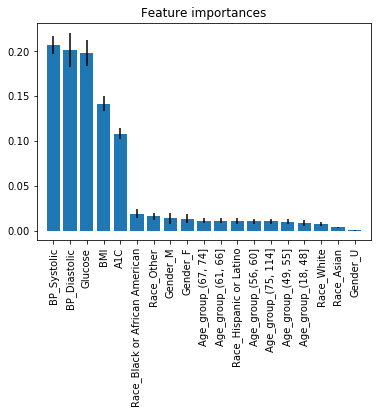

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [predictors[int(i)] for i in indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [119]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
y_test_predicted = forest.predict(X_test)
print(classification_report(y_test, y_test_predicted))
print(confusion_matrix(y_test, y_test_predicted))

             precision    recall  f1-score   support

          0       0.05      0.01      0.02       216
          1       0.08      0.01      0.02       356
          2       0.00      0.00      0.00        67
          3       0.15      0.04      0.06       678
          4       0.76      0.95      0.84      3976

avg / total       0.60      0.72      0.64      5293

[[   2    5    1    7  201]
 [   7    5    2   15  327]
 [   1    4    0    3   59]
 [  13   13    2   28  622]
 [  20   34    2  138 3782]]


In [120]:

scores = cross_val_score(RandomForestClassifier(n_estimators=20),  # steps to convert raw messages into models
                         X,  # training data
                         y,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                          #So train-test split is same
                         )
print(scores)
print(scores.mean())
print(scores.std())



[ 0.72914072  0.72024922  0.7271028   0.71713396  0.7319202   0.72988147
  0.72177168  0.7099189   0.72114785  0.71910112]
0.722736792688
0.00643433106128
